In [43]:
import nltk
import pandas as pd
import numpy as np
import re
import regex
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF
import string
import gensim 
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models import Nmf
from gensim.models import CoherenceModel

In [2]:
df=pd.read_csv('reddit.csv')

### EDA & Data Cleaning 

In [3]:
df.head()
df.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
#remove empty rows
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [5]:
#check for duplicates 
df[df.duplicated()]

,index,title,post


In [6]:
#URL link removal
removeUrl = lambda x: re.sub('https?:\/\/[\da-z\.-]+\.[a-z\.]{2,6}[^\s]+', "", x)
df['post']=df.post.map(removeUrl)

In [7]:
#text lower and number removal 
df['post']= df['post'].apply(lambda x: x.lower())
remove_num = lambda x: re.sub('\w*\d\w*', ' ', x)
df['post']=df.post.map(remove_num)

In [8]:
# toknize
df['post']=df.post.map(word_tokenize)

In [9]:
#stop word removal + added words 
stopwords = nltk.corpus.stopwords.words('english')
added_words=['would','make','also','get','still','way','like','much','nbsp','think','could','well','feel']
for word in added_words:
    stopwords.append(word)
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['post']=df.post.map(remove_stopwords)

In [10]:

#lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['post']=df['post'].apply(lambda x:lemmatizer(x))

In [11]:
# remvoe punctuation
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))


df['post']=df.post.map(listToString)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
df['post']=df.post.map(punc_lower)

#removePunc=lambda x:x.translate(str.maketrans('','',string.punctuation))
#df['post']=df.post.map(removePunc)


In [12]:
cv1 = CountVectorizer()
c= cv1.fit_transform(df.post)

In [13]:
pd.DataFrame(c.toarray(), columns=cv1.get_feature_names()).head()
#pd.DataFrame(c.toarray(),index=nba['post'], columns=cv1.get_feature_names()).head()

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#cv1.get_feature_names()[0:1000]

['aaa',
 'aaron',
 'aau',
 'ab',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abdel',
 'abducted',
 'abdul',
 'abides',
 'abilities',
 'ability',
 'abit',
 'ablaze',
 'able',
 'above',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absue',
 'absurd',
 'absurdity',
 'absurdly',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abusing',
 'abysmal',
 'academic',
 'acccidentally',
 'accelerate',
 'accent',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessed',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accolade',
 'accommodate',
 'accompany',
 'accomplished',
 'accord',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accumulated',
 'accumulates',
 'accuracy',
 'accurate',
 'accutane',
 'acg',
 'ache',
 'achey',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'achilles',
 'achiuwa',
 'acid',
 'acie',
 'acknowledging',
 'acl',
 'acosta',


### NMF

In [56]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(c)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [58]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2",'component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10'],
             columns = cv1.get_feature_names())
topic_word

,aaa,aaron,aau,ab,aba,abandon,abandoned,abandoning,abdel,abducted,...,zydrunas,álvaro,ďays,šarić,štrba,сhina,细拉,阿姆西,震旦与食人魔实机兵种展示,𝘳𝘦𝘢𝘭𝘭𝘺
component_1,0.003,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.003,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.001
component_2,0.000,0.003,0.313,0.000,0.001,0.000,0.000,0.000,0.000,0.000,...,0.004,0.001,0.000,0.004,0.000,0.002,0.001,0.000,0.000,0.001
component_3,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
component_4,0.095,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.089,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
component_5,0.000,0.319,0.000,0.000,0.001,0.000,0.000,0.000,0.047,0.000,...,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.000
component_6,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.091,0.000,0.001,0.000,0.000,0.000
component_7,0.024,0.000,0.002,0.000,0.000,0.001,0.000,0.002,0.000,0.082,...,0.002,0.001,0.000,0.001,0.000,0.000,0.003,0.000,0.000,0.003
component_8,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.001,0.003,0.000,0.002,0.004,0.000,0.001,0.006,0.000,0.000,...,0.014,0.000,0.002,0.005,0.000,0.003,0.002,0.000,0.000,0.002
component_10,0.107,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.004


In [59]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [60]:
display_topics(nmf_model, cv1.get_feature_names(), 30)


Topic  0
horizon, game, forza, xsx, series, racing, best, world, open, pc, critic, xbox, new, one, mexico, star, experience, fun, entry, time, good, racer, motorsport, made, formula, content, everything, offer, fan, title

Topic  1
team, player, nba, jvbl, league, year, school, new, contract, organization, system, basketball, may, ncaa, feeder, host, current, per, age, draft, season, deal, one, play, coach, idea, university, number, time, game

Topic  2
world, game, banjo, character, one, duo, tooie, transformation, first, original, kazooie, mumbo, pad, fight, lot, flight, humba, take, section, better, fps, element, bos, ability, new, switch, moment, fun, different, peak

Topic  3
tensei, megami, shin, game, nintendo, switch, combat, jrpg, one, series, fan, star, world, atlus, entry, time, trailer, new, gameplay, story, lot, rpg, best, great, worth, franchise, excellent, review, experience, even

Topic  4
team, pf, pt, nba, ast, stl, blk, pm, com, min, game, fg, stats, ft, pg, sf, sg,

In [19]:
#df.to_csv('check1.csv')

coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, \
               id2word = dict_, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=final_reviews,\
         dictionary=dict_, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Text(0, 0.5, 'explained variance ratio')

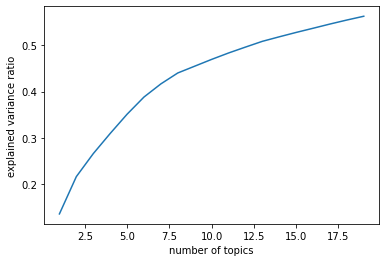

In [20]:
numberOfTopics=[]
explained_v=[]
for n_topics in range(1,20):
    lsa = TruncatedSVD(n_topics)
    doc_topic = lsa.fit_transform(c)
    lsa.explained_variance_ratio_
    numberOfTopics.append(len(lsa.explained_variance_ratio_))
    explained_v.append(sum(lsa.explained_variance_ratio_))
plt.plot(numberOfTopics,explained_v)
plt.xlabel('number of topics')
plt.ylabel('explained variance ratio')

In [21]:
 lsa = TruncatedSVD(7)
doc_topic = lsa.fit_transform(c)


In [22]:
display_topics(lsa, cv1.get_feature_names(), 10)


Topic  0
game, team, player, world, one, nba, new, time, year, horizon

Topic  1
team, nba, player, jvbl, league, school, pf, pt, year, contract

Topic  2
world, banjo, character, duo, tooie, transformation, original, mumbo, kazooie, first

Topic  3
megami, tensei, shin, nintendo, party, switch, combat, jrpg, player, mario

Topic  4
pf, pt, megami, tensei, shin, ast, stl, blk, pm, com

Topic  5
party, mario, superstar, board, minigames, nintendo, nostalgia, pf, new, pt

Topic  6
game, second, dive, rule, overwatch, brigitte, hero, submission, information, shot


In [23]:
df['token']=df.post.map(word_tokenize)

In [53]:
texts = df['token']
dictionary = Dictionary(texts)
dictionary.filter_extremes( no_below=3 ,no_above=0.85 ,keep_n=5000 )
corpus = [dictionary.doc2bow(text) for text in texts]
topic_nums = list(np.arange(5, 50, 5))

Text(0, 0.5, 'coherence score')

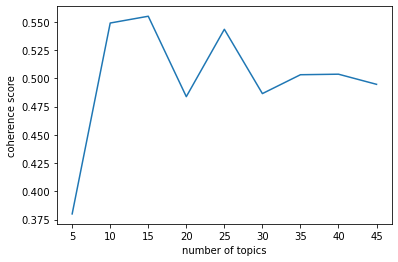

In [54]:
coherence_scores = []
for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# plot number of topics Vs coherence_scores
plt.plot(topic_nums,coherence_scores)
plt.xticks(topic_nums);
plt.xlabel('number of topics')
plt.ylabel('coherence score')

In [46]:

coherence_scores

[0.37996, 0.54888, 0.55488, 0.48373, 0.54334]

In [47]:
topic_nums

[5, 10, 15, 20, 25]

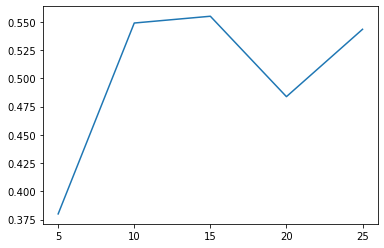

In [51]:
plt.plot(topic_nums,coherence_scores)
plt.xticks(topic_nums);

array([[5.24809668e-02, 0.00000000e+00, 0.00000000e+00, ...,
        9.16676862e-05, 9.16676862e-05, 4.77931621e-03],
       [0.00000000e+00, 3.93433135e-03, 2.93669709e-01, ...,
        2.29054783e-05, 2.29054783e-05, 1.15961935e-03],
       [9.75114529e-03, 0.00000000e+00, 0.00000000e+00, ...,
        3.88376370e-04, 3.88376370e-04, 3.21944575e-04],
       [9.31255190e-02, 0.00000000e+00, 0.00000000e+00, ...,
        5.47629590e-04, 5.47629590e-04, 4.12259317e-04],
       [3.91810218e-03, 3.09467444e-01, 0.00000000e+00, ...,
        4.97647880e-04, 4.97647880e-04, 8.72348379e-04]])